---
# ***Non-convex function minimization***

# **1. Convex-ConCave-Procedure**  
* Assume that $f$ is non-convex but can be decomposed into a sum of convex and concave functions such that $f = g+h$ ,where $g$ is convex and $h$ is concave.  
* one of the powerful optimization algorithm for obtaining a local minimizer of $f$ ,which iteratively solves convex minimization problems.  
>1. Define the linear approximation of $h$ at a given point $\mathbf{x}^c$ ,that is,  
$h_{l}(\mathbf{x}|\mathbf{x}^c)  = h(\mathbf{x}_c) + \nabla h(\mathbf{x}^c)^T(\mathbf{x} - \mathbf{x}^c)$ ; convex  
>2. Updata $\mathbf{x}^c$ until convergence with the minimizer of  
$f_l(\mathbf{x}|\mathbf{x}^c) = g(\mathbf{x}) + h_l(\mathbf{x} | \mathbf{x}^c) = g(\mathbf{x}) +h(\mathbf{x}_c) + \nabla h(\mathbf{x}^c)^T(\mathbf{x} - \mathbf{x}^c)$  
; convex + convex = convex  

* Note that $f_l$ is convex hence can apply various optimization algorithms.  
* It is well known that under mild conditions, the CCCP algorithm converges to a local minimizer eventually.  

## **Algorithm**  
>1. Set an initial $\mathbf{x}_1$  
>2. For $n=1, 2, \cdots, $  
    (1) Let $\mathbf{x}_{n+1} = argmin_{\mathbf{x}}f_l(\mathbf{x}|\mathbf{x}_n)$  
    (2) If $\rVert \mathbf{x}_{n+1} - \mathbf{x}_n \rVert_2 < \epsilon$ then stop  
>3. Set $\hat{\mathbf{x}} = \mathbf{x}_n$

---
# **2. Sub-Gradient Descent Algorithm**  
* What if $f$ is convex but non-differentiable?  
* $\mathbf{s}$ is a sub-gradient of $f$ at $\mathbf{x}$ if $f(\mathbf{z}) \ge \mathbf{s}^T(\mathbf{z} - \mathbf{x})$ ,$\forall \mathbf{z} \in \mathit{D}$  
    + If $f$ is convex there is at least one sub-gradient of $f$ at any $\mathbf{x} \in \mathit{D}$  
    + If $f$ is convex and differentiable then $\nabla f(\mathbf{x})$ is unique sub-gradient of $f$ at $\mathbf{x}$  
* say the set of all sub-gradients of $f$ at $\mathbf{x}$ the sub-differential of $f$ at $\mathbf{x}$  
$\partial f(\mathbf{x}) = \{\mathbf{s} | f(\mathbf{z}) \ge \mathbf{s}^T(\mathbf{z} - \mathbf{x}), \forall \mathbf{z} \in \mathit{D}\}$  
* **optimality conditions**  
    + If $f$ is convex and differentiable then $f(\mathbf{x}^*) = inf_{\mathbf{x}\in \mathit{D}}f(\mathbf{x}) \Leftrightarrow \nabla f(\mathbf{x}^*) = \mathbf{0}$  
    + If $f$ is non-differentiable then $f(\mathbf{x}^*) = inf_{\mathbf{x} \in \mathit{D}}f(\mathbf{x}) \Leftrightarrow \mathbf{0} \in \partial f(\mathbf{x}^*)$ ; sub-differential set of $\mathbf{x}^*$  
    
## **Algorithm**  
> $\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha_n\mathbf{s}_n$ ,$\mathbf{s}_n \in \partial f(\mathbf{x}_n)$  
* **Simple but not descent for every step**  
* **step size can be determined as follow**  
    constatnt : $\alpha_n = \alpha > 0$  
    constant step length : $\alpha_n = \alpha \rVert \mathbf{s}_n \rVert_2$  
    square summable but non-summable  
    : $\sum_{n}\alpha^2_n < \infty$ and $\sum_{n}\alpha_n = \infty, e.g. \alpha_n = a/(b+n)$   
    non-summable but diminishing  
    : $\sum_n \alpha_n = \infty$ and $\lim_n \alpha_n = 0 , e.g., \alpha_n = a/(b+\sqrt{n})$  
* **stoping rule**  
    $f^{best}_{n+1} = min\{f^{best}_{n}, f(\mathbf{x}_{n+1}) \}$ , $f^{best}_{n} = min_{k \le n}f(\mathbf{x}_n)$


---
# **3. Stochastic Gradient Descent**  
* Assume that we are to minimize an empirical risk function of independent samples $(y_i, \mathbf{x}_i) ,i \le n$  
    $R_n(\mathbf{\beta}) = \sum^{n}_{i=1}L(y_i, f(\mathbf{x}_i;\mathbf{\beta}))/m$  
* Ordinary gradient descent algorithm with step size $\alpha > 0$  
    $\mathbf{\beta}_{k+1} = \mathbf{\beta}_{k} - \alpha\nabla R_n(\mathbf{\beta}_k) ,k \ge 1$  
    where $\nabla R_n(\mathbf{\beta}) = \sum^{n}_{i=1}\nabla L(y_i, f(\mathbf{x}_i;\mathbf{\beta}))/m$  
* What if $n$ is huge?  
> SGD algorithm is an alternative to gradient descent algorithm  
: $\mathbf{\beta}_{k+1} = \mathbf{\beta}_k - \alpha \nabla R_{\mathit{S}}(\mathbf{\beta}_k) , k \ge 1$  
    + $\mathit{S}$ : random subset of $\{1, \cdots, n\}$  
    + $\nabla R_{\mathit{S}}(\mathbf{\beta}) = \sum_{i \in \mathit{S}}\nabla L(y_i, f(\mathbf{x}_i; \mathbf{\beta})) / |\mathit{S}|$  
    + stochastic : $|\mathit{S}| = 1$
    + mini-batch : $|\mathit{S}| > 1$  
    + batch : $\mathit{S} = \{1, \cdots, n\}$

## **[Example - LogisticRegression]**  
* Let $R_n(\mathbf{\beta}) = \sum^{n}_{i=1}(-y_i\mathbf{x}^T_i\mathbf{\beta} + log(1+exp(\mathbf{x}^T_i\mathbf{\beta})))/n$  
* logistic regression  $\hat{\mathbf{\beta}}^{\lambda} = argmin_{\mathbf{\beta}} R_n(\mathbf{\beta})$  
* convex, two times differentiable  


### **Gradient Descent**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def getLoss(y, X, bvec):
    xbvec = np.matmul(X, bvec)
    loss = np.sum(-y * xbvec + np.log(1 + np.exp(xbvec)))
    return loss

def getGrad(y, X, bvec):
    exbvec = np.exp(np.matmul(X, bvec))
    pvec = exbvec / (1 + exbvec)
    grad = np.matmul(np.transpose(X), (pvec - y))
    return grad

def logisticGD(y, X, bvec, alpha=10, eps=1e-7, iter_max=1000):
    losses = []
    alpha_in = alpha
    for i in range(iter_max):
        gvec = getGrad(y, X, bvec)
        loss = getLoss(y, X, bvec)
        losses.append(loss)
        # stepsize from the backtracking rule
        for j in range(iter_max):
            nbvec = bvec - alpha * gvec # new bvec
            if getLoss(y, X, nbvec) > loss: 
                alpha = alpha / 2
            else: break
        if np.sum(np.abs(nbvec - bvec)) < eps: break
        bvec = nbvec.copy()
        alpha = alpha_in
    return bvec, losses, gvec, i

In [ ]:
n = 200
p = 5
q = 3
X = np.random.normal(0, 1, [n, p])
bvec = np.concatenate((np.ones(q), np.zeros(p - q)))
exbvec = np.exp(np.matmul(X, bvec))
pvec = exbvec / (1 + exbvec)
y = np.random.binomial(1, pvec)

In [ ]:
betaGD, loss, gradGD, iteration = logisticGD(y, X, np.zeros(p), alpha=1)
betaGD, gradGD

(array([ 1.26771589,  0.9581374 ,  1.16107869, -0.0969353 ,  0.07863125]),
 array([ 7.53650924e-07,  1.05920495e-08, -8.99395672e-08,  1.56346359e-06,
        -6.94164405e-07]))

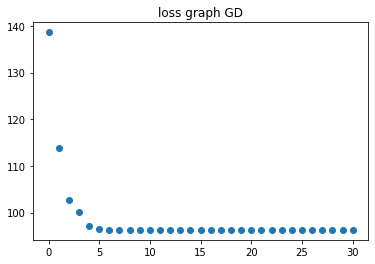

In [ ]:
plt.scatter(range(iteration + 1), loss)
plt.title('loss graph GD')
plt.show()

### **SGD**

In [ ]:
def logisticSGD(y, X, bvec, alpha=10, sub=10, eps=1e-7, iter_max=1000):
    loss = []
    n = y.shape
    for i in range(iter_max):
        loss.append(getLoss(y, X, bvec))
        sample = np.random.randint(n, size=sub)
        gvec = getGrad(y[sample], X[sample], bvec)
        bvec = bvec - alpha * gvec
        if np.abs(np.min(loss) - getLoss(y, X, bvec)) < eps: break
    return  bvec, loss, gvec, i

In [ ]:
n = 1000
p = 5
q = 3
X = np.random.normal(0, 1, [n, p])
bvec = np.concatenate((np.ones(q), np.zeros(p - q)))
exbvec = np.exp(np.matmul(X, bvec))
pvec = exbvec / (1 + exbvec)
y = np.random.binomial(1, pvec)

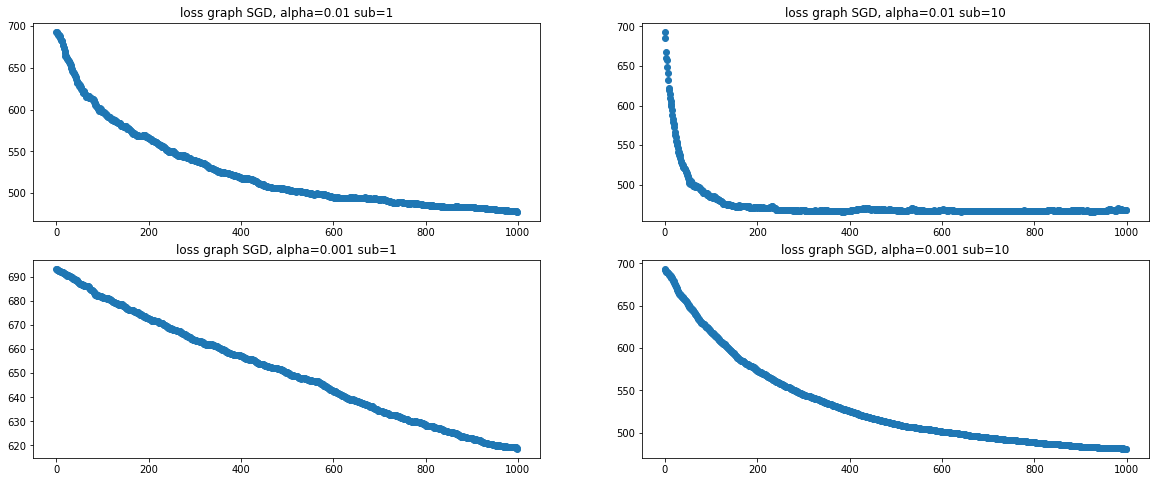

In [ ]:
cnt = 1
plt.figure(figsize=(20, 8))
for alpha in [.01, .001]:
    for sub in [1, 10]:
        beta, loss, grad, iteration  = logisticSGD(y, X, np.zeros(p), alpha, sub)
        plt.subplot(2, 2, cnt)
        plt.scatter(range(iteration + 1), loss)
        plt.title('loss graph SGD, alpha='+str(alpha)+' sub='+str(sub))
        cnt = cnt + 1
plt.show()

## **[Example - LASSO]**  
* lasso for logistic regression $\hat{\mathbf{\beta}}^{\lambda} = argmin_{\mathbf{\beta}}R_n(\mathbf{\beta}) + \lambda \sum^{p}_{j=1}|\beta_j|$  
* convex, non-differentiable but separable, sub-differentiable

### **sub-gradient descent**

In [ ]:
def logisticSub(y, X, bvec, alpha=10, lam=1, eps=1e-7, iter_max=1000):
    loss = []
    for i in range(iter_max):
        loss.append(getLoss(y, X, bvec))
        gvec = getGrad(y, X, bvec) + lam * np.sign(bvec)
        bvec = bvec - alpha * gvec
        if np.abs(np.min(loss) - getLoss(y, X, bvec)) < eps: break
    
    return bvec, loss, gvec, i

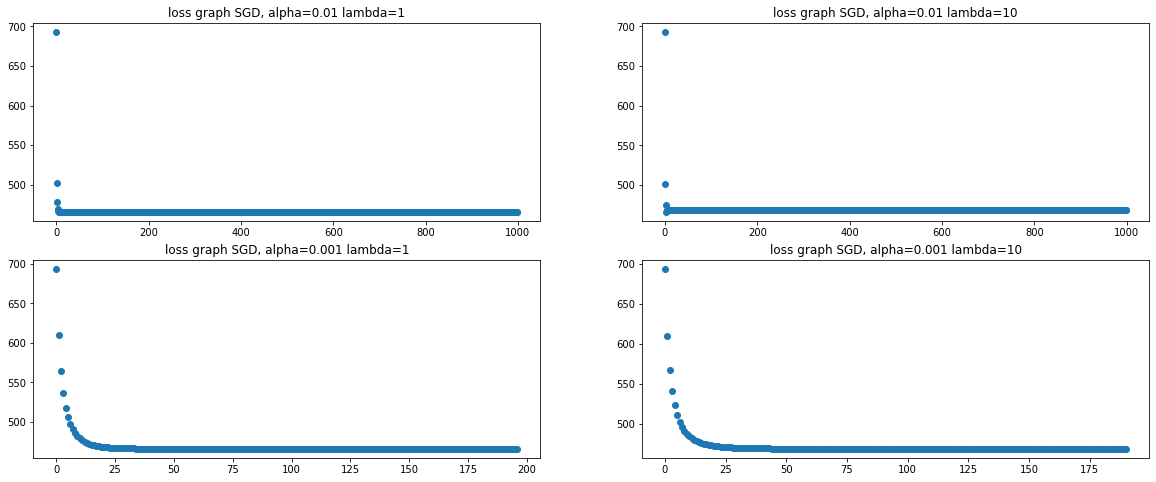

In [ ]:
cnt = 1
plt.figure(figsize=(20, 8))
for alpha in [.01, .001]:
    for lam in [1, 10]:
        beta, loss, grad, iteration  = logisticSub(y, X, np.zeros(p), alpha, lam)
        plt.subplot(2, 2, cnt)
        plt.scatter(range(iteration + 1), loss)
        plt.title('loss graph SGD, alpha='+str(alpha)+' lambda='+str(lam))
        cnt = cnt + 1
plt.show()